In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load data for performing appropriate hypothetical study.

In [3]:
salead=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/CS04 Sales_add.csv")
salead.head(5)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


## checking data

In [8]:
salead.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [9]:
salead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


Which is clear that there is no missing values in given data.<br>
Also we can say that here we have three of string values and another column of integer values.<br>
From the provided data it is clear that the sample size, n = 22.

In [10]:
salead.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# 1. To perform Paired or dependent T-test

In [29]:
b=salead['Sales_before_digital_add(in $)']
a=salead['Sales_After_digital_add(in $)']

### Checking Assumption of Normality

<AxesSubplot:xlabel='Sales_After_digital_add(in $)'>

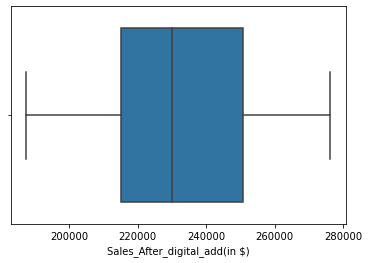

In [33]:
sns.boxplot(x=a,data=salead)

<AxesSubplot:xlabel='Sales_before_digital_add(in $)'>

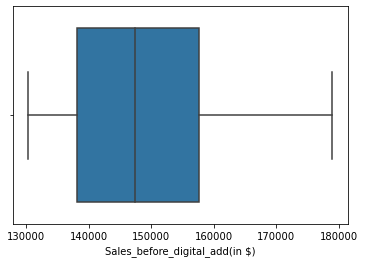

In [34]:
sns.boxplot(x=b,data=salead)

**Interpretation:-**<br>
Since we can see that min and max value of sales after are 187305, 276279 respectively and since when both min and max values are lies inside the limits we can say that there is no outliers exits. And the min and max value of sales before are 130263, 178939 respectively and since when both min and max values are lies inside the limits we can say that there is no outliers exits.<br>
Also we can assume that both are approximately symmetrically distributed.<br>
Assume that samples are iid.

## Paired t test.

We can use paired t test using two ways.<br>
(i) Paired t test using SciPy <br>
(ii) Paired t test using Pingouin <br>

### (i) Using Scipy

In [64]:
from scipy.stats import ttest_rel
t_test,p_value=ttest_rel(a, b,alternative='less')


In [65]:
print('test statistic = ','%.3f'%t_test)

test statistic =  12.091


In [66]:
print('p-value = ','%.4f'%p_value)

p-value =  1.0000


### (i) Using Pingouin

In [67]:
import pingouin as pt
pt.ttest(a,b, paired=True,alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.090705,21,less,1.0,"[-inf, 93537.43]",3.918165,3.444e-09,9.887039e-76


## 5 Step Hypothesis:

we assume all conditions are met. Let µd be the true population mean difference between beginning and end.<br>
That is Difference, di = after – before <br>
Here we use standard significance level, α = 0.05

#### STEP 1. HYPOTHESIS

Here the claim is that the true population mean difference is greater than 0 (that means increase in sales after implemnetation new policy). Against alternative claim is that the true population mean difference is equal to 0 (after implementation of policy sales hasn't increase)<br>
Hypothesis:<br>
Null hypothesis,             H0: µd = 0 <br>
Alternative hypothesis,      Ha: µd > 0 <br>
(This is a left tailed test)

#### STEP 2. TEST STATISTIC


test statistic, T = 12.09

#### STEP 3. P-VALUE

P-value = 0

#### STEP 4. DECISION

Since the P-value = 0 < α = 0.05, we can conclude that the reject the null hypothesis (H0).

#### STEP 5. CONCLUSION

At 5% level of significance. There is sufficient enough evidence to support the claim that the after implementation (after steeping into digital marketing) there is increase in sales.

# 2. To checking whether the Region and Manger are dependent or not.

## Creating a 3 * 3 contengency table.

In [69]:
cont_tab=pd.crosstab(salead["Region"],salead["Manager"],margins=True)
cont_tab

Manager,Manager - A,Manager - B,Manager - C,All
Region,,,,
Region - A,4,3,3,10
Region - B,4,1,2,7
Region - C,1,3,1,5
All,9,7,6,22


## Chi-square test for independence.

In [84]:
from scipy.stats import chi2_contingency
t_test,p_value,df,ex=chi2_contingency(cont_tab, correction=False)

In [ ]:
print

## 5 Step Hypothesis:

#### STEP 1. Hypothesis:

H0: There is no relationship between Regions and Managers (independent)
H1: There is relationship between Regions and Managers (dependent)
(This is a right tailed test)


#### STEP 2. TEST STATISTICS

In [86]:
print('χ2 =','%.3f'%t_test)

χ2 = 3.051


#### STEP 3. P VALUE

In [87]:
print('p value =','%.4f'%p_value)

p value = 0.9623


#### STEP 4. DECISION

Since the P-value = 0.9623 > α = 0.05, we can conclude that the we failed to reject the null hypothesis (H0).

#### CONCLUSION:

At 5% level of significance. There is no sufficient enough evidence to support the claim that there is no dependency between the features **Regions** and **Managers**
